In [1]:
# Suppress Warning messages
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
PROBLEM_NAME = 'Queens'
ALGORITHM_NAME = 'SA'

In [4]:
PROBLEM_SIZE = 100

In [5]:
out_dir = f'metrics'
os.makedirs(out_dir, exist_ok=True)

In [6]:
all_df = pd.read_csv(f'metrics/{ALGORITHM_NAME.lower()}.csv')

In [7]:
all_df.columns

Index(['Iteration', 'Time', 'Fitness', 'FEvals', 'Temperature', 'max_iters',
       'decay_type', 'problem_size', 'max_attempts', 'run_number',
       'group_timestamp', 'total_runtime', 'num_edges', 'optimal_fitness'],
      dtype='object')

In [8]:
print(all_df['decay_type'].unique())
print(all_df['Temperature'].unique())
print(all_df['problem_size'].unique())

['ExpDecay' 'GeomDecay' 'ArithDecay']
[1.e-01 1.e-02 1.e+00 1.e+01 1.e+02]
[100]


In [9]:
all_df = all_df[all_df['Temperature'].isin([1, 10, 100])]

In [10]:
all_df['Temperature'] = all_df['Temperature'].astype(int)

In [11]:
all_df['X'] = all_df.apply(lambda row: f"Temp={row['Temperature']}, DecayType={row['decay_type']}", axis=1)

In [12]:
all_df['X'].unique()

array(['Temp=1, DecayType=ExpDecay', 'Temp=1, DecayType=GeomDecay',
       'Temp=1, DecayType=ArithDecay', 'Temp=10, DecayType=ExpDecay',
       'Temp=10, DecayType=GeomDecay', 'Temp=10, DecayType=ArithDecay',
       'Temp=100, DecayType=ExpDecay', 'Temp=100, DecayType=GeomDecay',
       'Temp=100, DecayType=ArithDecay'], dtype=object)

In [13]:
def get_color(X):
    if 'DecayType=ExpDecay' in X:
        return 'red'
    elif 'DecayType=GeomDecay' in X:
        return 'blue'
    elif 'DecayType=ArithDecay' in X:
        return 'green'
    else:
        raise Exception(f'Unknown X: {X}')
def get_style(X):
    if 'Temp=1,' in X:
        return 'dotted'
    elif 'Temp=100,' in X:
        return '--'
    elif 'Temp=1000,' in X:
        return '-'

In [14]:
metrics = {}

for group in sorted(all_df['X'].unique()):
    df = all_df[all_df['X'] == group]
    assert(len(df['group_timestamp'].unique()) == 1)
    last_iter = df['Iteration'].max()
    metrics[group] = {
        'iter': [],
        'fitness_mean': [],
        'fitness_std': [],
    }
    for iter_i in range(1, last_iter+1, 10):
        iter_df = df[df['Iteration'] == iter_i]
        metrics[group]['iter'].append(iter_i)
        metrics[group]['fitness_mean'].append(iter_df['Fitness'].mean())
        metrics[group]['fitness_std'].append(iter_df['Fitness'].std())

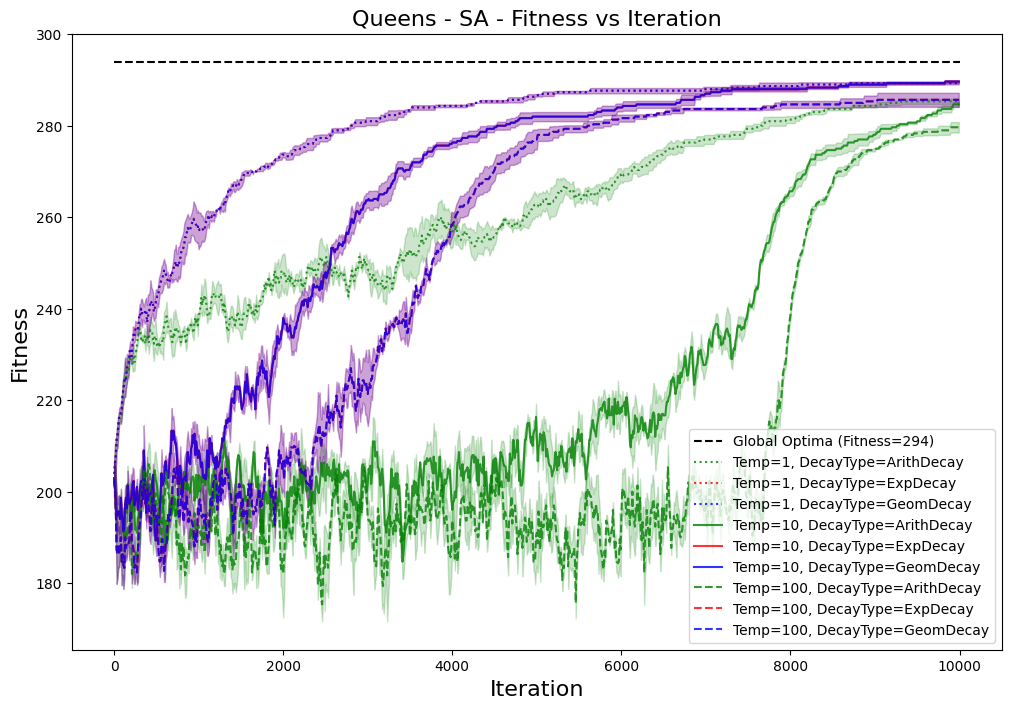

In [15]:
fontsize = 16
plt.figure(figsize=(12, 8))
last_iter = all_df['Iteration'].max()
plt.hlines(294, 0, last_iter, color='black', linestyle='dashed', alpha=1.0, label='Global Optima (Fitness=294)')
for group in metrics:
    linestyle = get_style(group)
    color = get_color(group)
    # if color != 'red':
    #     continue
    plt.plot(metrics[group]['iter'], metrics[group]['fitness_mean'], label=group, color=color, linestyle=linestyle, alpha=0.8)
    mean = np.array(metrics[group]['fitness_mean'])
    std = np.array(metrics[group]['fitness_std']) / 2
    lower = mean - std
    upper = mean + std 
    plt.fill_between(metrics[group]['iter'], lower, upper, alpha=0.2, color=color)
plt.title(f'{PROBLEM_NAME} - {ALGORITHM_NAME} - Fitness vs Iteration', fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Fitness', fontsize=fontsize)
plt.legend()
plt.savefig(f'{out_dir}/{PROBLEM_NAME}_{ALGORITHM_NAME.lower()}_fitness_vs_iteration.png')